<a href="https://colab.research.google.com/github/pokiiii-bot/upi-fraud-detection/blob/main/UPI_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Install necessary libraries (if not pre-installed)
!pip install pandas numpy scikit-learn matplotlib seaborn
!pip install imbalanced-learn


In [ ]:
from sklearn.datasets import make_classification
import pandas as pd

# Create a synthetic dataset
X, y = make_classification(n_samples=10000, n_features=10,
                           n_informative=6, n_redundant=2,
                           weights=[0.98], random_state=42)

columns = ['amount', 'merchant_id', 'time', 'upi_type', 'device_type',
           'txn_day', 'txn_hour', 'customer_age', 'geo_distance', 'txn_velocity']

data = pd.DataFrame(X, columns=columns)
data['is_fraud'] = y


In [ ]:
data.info()
data.describe()
data.isnull().sum()
data['is_fraud'].value_counts(normalize=True)  # Check class imbalance


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   amount        10000 non-null  float64
 1   merchant_id   10000 non-null  float64
 2   time          10000 non-null  float64
 3   upi_type      10000 non-null  float64
 4   device_type   10000 non-null  float64
 5   txn_day       10000 non-null  float64
 6   txn_hour      10000 non-null  float64
 7   customer_age  10000 non-null  float64
 8   geo_distance  10000 non-null  float64
 9   txn_velocity  10000 non-null  float64
 10  is_fraud      10000 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


,proportion
is_fraud,
0,0.9752
1,0.0248


<Axes: title={'center': 'Fraud vs Non-Fraud'}>

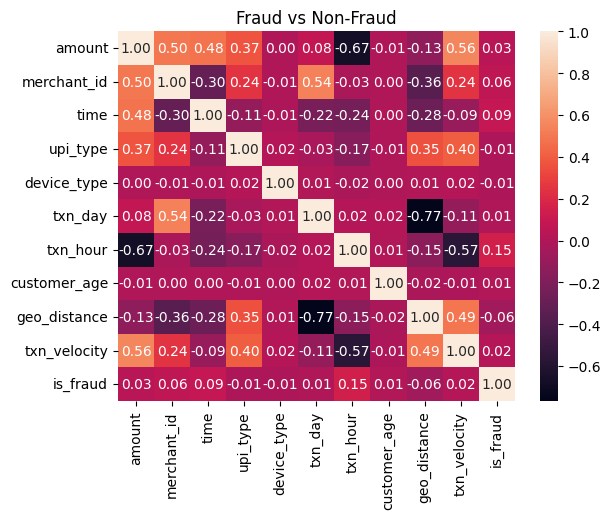

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='is_fraud', data=data)
plt.title("Fraud vs Non-Fraud")

# Optional: Pairplots or correlation heatmaps
sns.heatmap(data.corr(), annot=True, fmt='.2f')


In [ ]:
from imblearn.over_sampling import SMOTE

X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1950    6]
 [  24 1921]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1956
           1       1.00      0.99      0.99      1945

    accuracy                           0.99      3901
   macro avg       0.99      0.99      0.99      3901
weighted avg       0.99      0.99      0.99      3901



In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])


np.float64(0.9995104378591217)

In [ ]:
import joblib

# Save your model
joblib.dump(model, 'upi_fraud_model.pkl')

# Download to local
from google.colab import files
files.download('upi_fraud_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pip install streamlit pandas scikit-learn joblib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 78.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.5 MB/s eta 0:00:00


In [ ]:
import joblib

# Load your model
model = joblib.load("upi_fraud_model.pkl")

# Take user input
amount = float(input("Enter amount: "))
merchant_id = float(input("Enter merchant ID (numeric): "))
time = float(input("Enter time (e.g., 14.5): "))
upi_type = input("Enter UPI type (P2P/P2M/P2B): ")
device_type = input("Enter Device type (Mobile/Web/POS): ")
txn_day = int(input("Enter transaction day (0=Mon to 6=Sun): "))
txn_hour = int(input("Enter transaction hour (0 to 23): "))
customer_age = int(input("Enter customer age: "))
geo_distance = float(input("Enter geo distance: "))
txn_velocity = float(input("Enter transaction velocity: "))

# Encode categorical features manually
upi_type_map = {'P2P': 0, 'P2M': 1, 'P2B': 2}
device_type_map = {'Mobile': 0, 'Web': 1, 'POS': 2}

features = [[
    amount,
    merchant_id,
    time,
    upi_type_map[upi_type],
    device_type_map[device_type],
    txn_day,
    txn_hour,
    customer_age,
    geo_distance,
    txn_velocity
]]

# Make prediction
prediction = model.predict(features)[0]

# Output
if prediction == 1:
    print("⚠️ Fraudulent Transaction Detected!")
else:
    print("✅ Legitimate Transaction.")


Enter amount: 500
Enter merchant ID (numeric): 343433215
Enter time (e.g., 14.5): 14.4
Enter UPI type (P2P/P2M/P2B): P2P
Enter Device type (Mobile/Web/POS): Web
Enter transaction day (0=Mon to 6=Sun): 4
Enter transaction hour (0 to 23): 10
Enter customer age: 22
Enter geo distance: 245
Enter transaction velocity: 56
⚠️ Fraudulent Transaction Detected!


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
